In order to derive combined posterior distributions, we must combine the posterior parameter distributions in likelihood space.

Consider two posterior distributions for models $M_{1}$ and $M_{2}$, with shared parameters $\theta$ and additional parameters $\pi_{1}$ and $\pi_{2}$: 
\begin{align}
&P\left(\theta,\pi_{1}|M_{1}\right)\\
&P\left(\theta,\pi_{2}|M_{2}\right)
\end{align}

A given posterior sample is defined as 
\begin{equation}
 x = P(\theta,\pi|M) \propto P(D|\theta,\pi)P(\theta|M)
\end{equation}

In order to combine the probabilities of the data given the model, we must marginalise over the additional parameters for each model:
\begin{align}
\int P(D|\theta,\pi_{1},M_{1})d\pi_{1} &= P(D|\theta,M_{1})\\
\int P(D|\theta,\pi_{2},M_{2})d\pi_{2} &= P(D|\theta,M_{2})
\end{align}

Then to combine the probabilities, we simply multiply the resulting distributions:
\begin{equation}
P(D|\theta,M_{1})P(D|\theta,M_{2})
\end{equation}

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import json

In [98]:
m1_samples = np.genfromtxt("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/e_full/out_PMN/HR8799e_23_v02_diseq_all_eqFeMgCloud_newphot_newSPHGPI_logg_post_equal_weights.dat")
m2_samples = np.genfromtxt("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/e_full/out_PMN/HR8799e_23_v01_diseq_all_eqFeMgCloud_newphot_newSPH_fseds_mrprior_post_equal_weights.dat")

with open("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/e_full/out_PMN/HR8799e_23_v02_diseq_all_eqFeMgCloud_newphot_newSPHGPI_logg_params.json") as file1:
    m1_params = json.load(file1)
with open("/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/e_full/out_PMN/HR8799e_23_v01_diseq_all_eqFeMgCloud_newphot_newSPH_fseds_mrprior_params.json") as file2:
    m2_params = json.load(file2)
evidence_m1 = 13213.6
#evidence_m2 = 13137.4
evidence_m2 = 13212.6 #making up an evidence so that the comparison is visible.
ind_m1 = m1_params.index("Fe/H")
ind_m2 = m2_params.index("Fe/H")
shared = []
for param in m1_params:
    if param in m2_params:
        shared.append(param)


Text(0.5, 0, '$\\theta$')

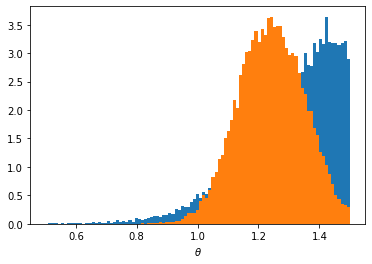

In [124]:
fig, ax = plt.subplots()
nsamples = 30000
const_len_m1 = np.random.randint(0,m1_samples.shape[0]-1,nsamples)
const_len_m2 = np.random.randint(0,m2_samples.shape[0]-1,nsamples)

bins = np.linspace(0.5,1.5,100)
n1,bins1,patches1=ax.hist(m1_samples[const_len_m1,ind_m1],density = True,bins = bins)
n2,bins2,patches2=ax.hist(m2_samples[const_len_m2,ind_m2],density = True,bins = bins)
n1/=(len(bins)-1)
n2/=(len(bins)-1)
ax.set_xlabel(r"$\theta$")

Text(0.5, 0, '$P(D|\\theta)$')

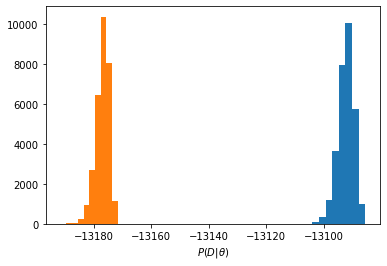

In [72]:
fig, ax = plt.subplots()
post_m1 = m1_samples[const_len_m1,-1]-evidence_m1-evidence_m2
post_m2 = m2_samples[const_len_m2,-1]-evidence_m1-evidence_m2
ax.hist(post_m1)
ax.hist(post_m2)
ax.set_xlabel(r"$P(D|\theta)$")



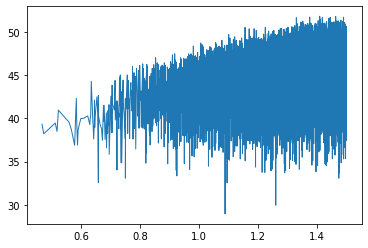

In [82]:
fig, ax = plt.subplots()
sorting = np.argsort(m1_samples[const_len_m1,ind_m1])
ax.plot(m1_samples[const_len_m1,ind_m1][sorting],m1_samples[const_len_m1,-1][sorting]-(evidence_m1),linewidth = 1)

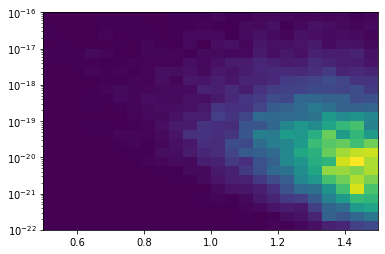

In [84]:
fig, ax = plt.subplots()
ax.hist2d(m1_samples[const_len_m1,ind_m1],np.exp(-(m1_samples[const_len_m1,-1]-evidence_m1)),bins = [np.linspace(0.5,1.5,25),np.logspace(-22,-16,25)])
ax.set_yscale('log')

Bayes Factors  1.0 -1.0
Model Probabilities  0.8807970779778824 0.11920292202211756


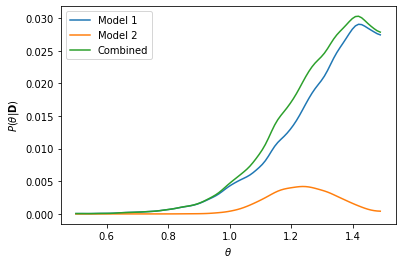

In [134]:
from scipy.ndimage import gaussian_filter
model_probability = 0.5
bayes_factor_12 = evidence_m1 - evidence_m2
bayes_factor_21 = evidence_m2 - evidence_m1
print("Bayes Factors ",bayes_factor_12,bayes_factor_21)

post_m1 = (np.exp(bayes_factor_12)*model_probability)/((np.exp(bayes_factor_21)*model_probability) + (np.exp(bayes_factor_12)*model_probability))
post_m2 = (np.exp(bayes_factor_21)*model_probability)/((np.exp(bayes_factor_21)*model_probability) + (np.exp(bayes_factor_12)*model_probability))

print("Model Probabilities ",post_m1,post_m2)
combined = (n1 * post_m1) + (n2 * post_m2)

gauss1 = gaussian_filter(n1 * post_m1,sigma = 2)
gauss2  = gaussian_filter(n2 * post_m2,sigma = 2)
gausscomb  = gaussian_filter(combined,sigma = 2)

fig, ax = plt.subplots()
ax.plot(bins[:-1],gauss1, label =  "Model 1")
ax.plot(bins[:-1],gauss2, label =  "Model 2")
ax.plot(bins[:-1],gausscomb, label =  "Combined")
ax.legend()
ax.set_ylabel(r"$P(\theta|\mathbf{D})$")
ax.set_xlabel(r"$\theta$")
plt.savefig("plots/CombineModelPosteriors.pdf",bbox_inches='tight')

